Letse gooooo
Step 1
Loading data...
Loading test data...
Step 2
Basic analysis of the training dataset
Number of training examples = 34799
Image data shape = (32, 32, 3)
Number of classes = 43
Step 3
Showing example images for classes 0-14 from the training dataset
0 . Class :  Speed limit (20km/h)


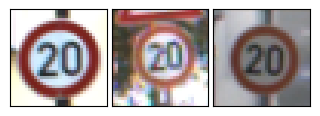

1 . Class :  Speed limit (30km/h)


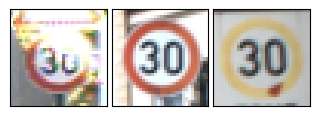

2 . Class :  Speed limit (50km/h)


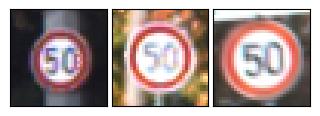

3 . Class :  Speed limit (60km/h)


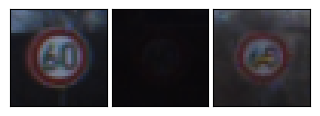

4 . Class :  Speed limit (70km/h)


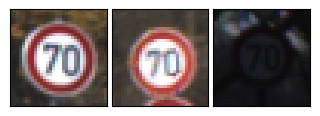

5 . Class :  Speed limit (80km/h)


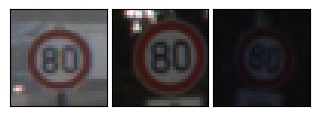

6 . Class :  End of speed limit (80km/h)


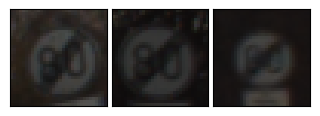

7 . Class :  Speed limit (100km/h)


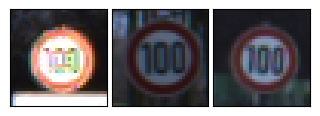

8 . Class :  Speed limit (120km/h)


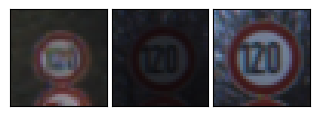

9 . Class :  No passing


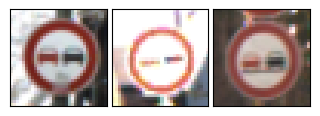

10 . Class :  No passing for vehicles over 3.5 metric tons


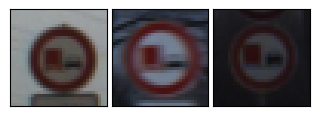

11 . Class :  Right-of-way at the next intersection


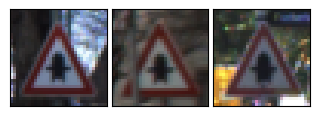

12 . Class :  Priority road


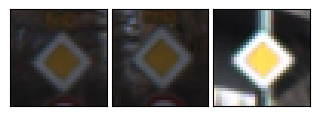

13 . Class :  Yield


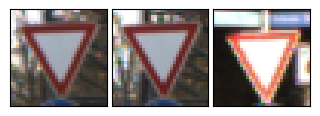

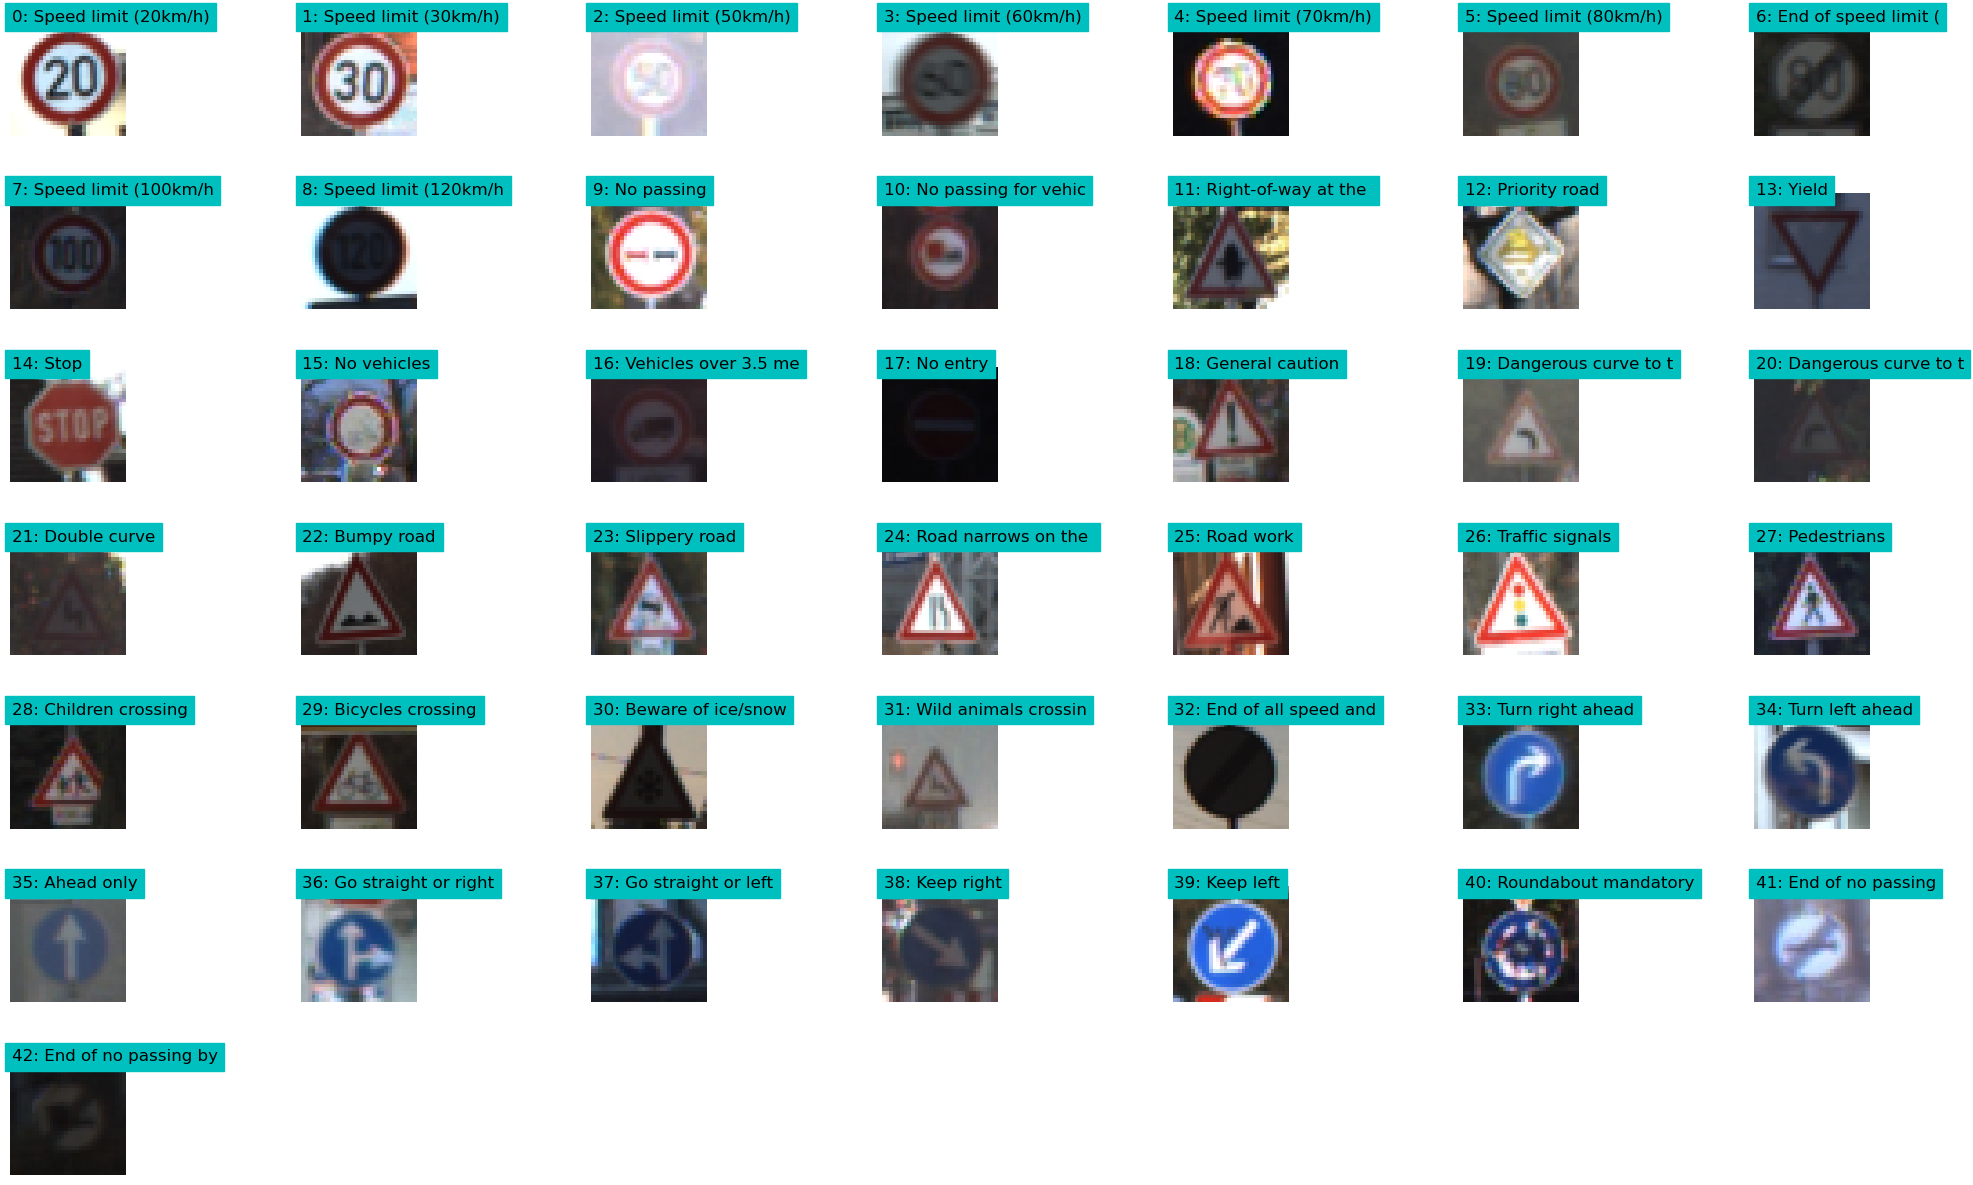

Step 4
Comparing occurences of each class in the training dataset


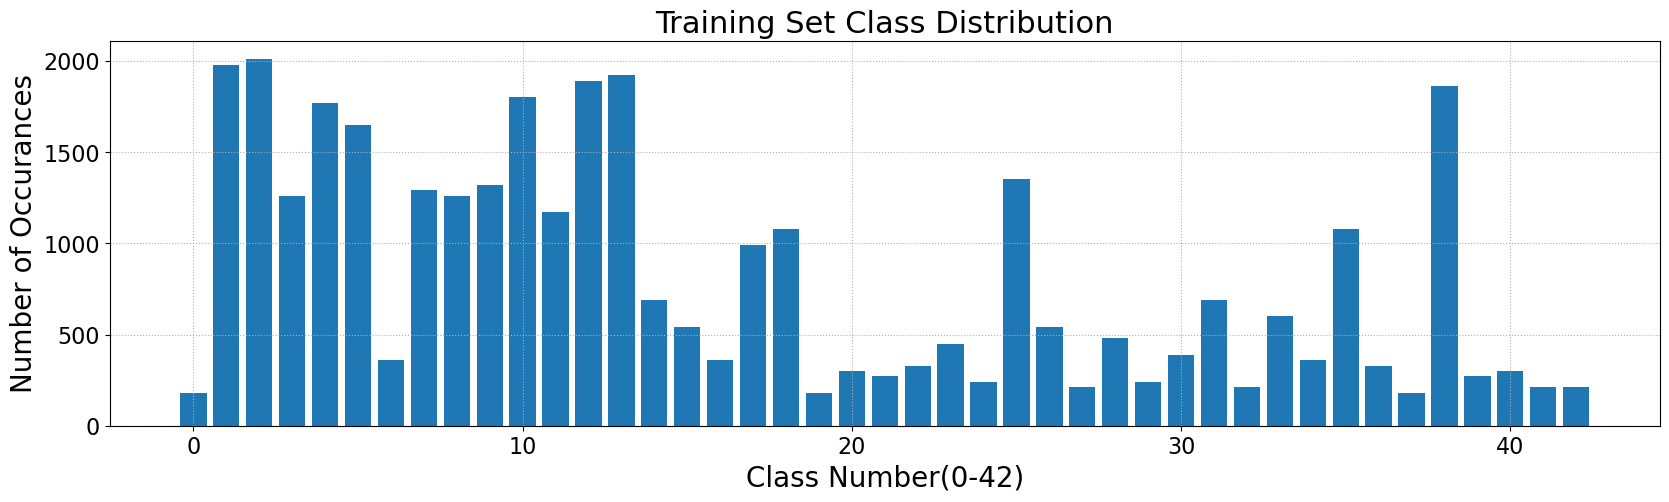

Step 6
Comparing occurences of each class in the test dataset


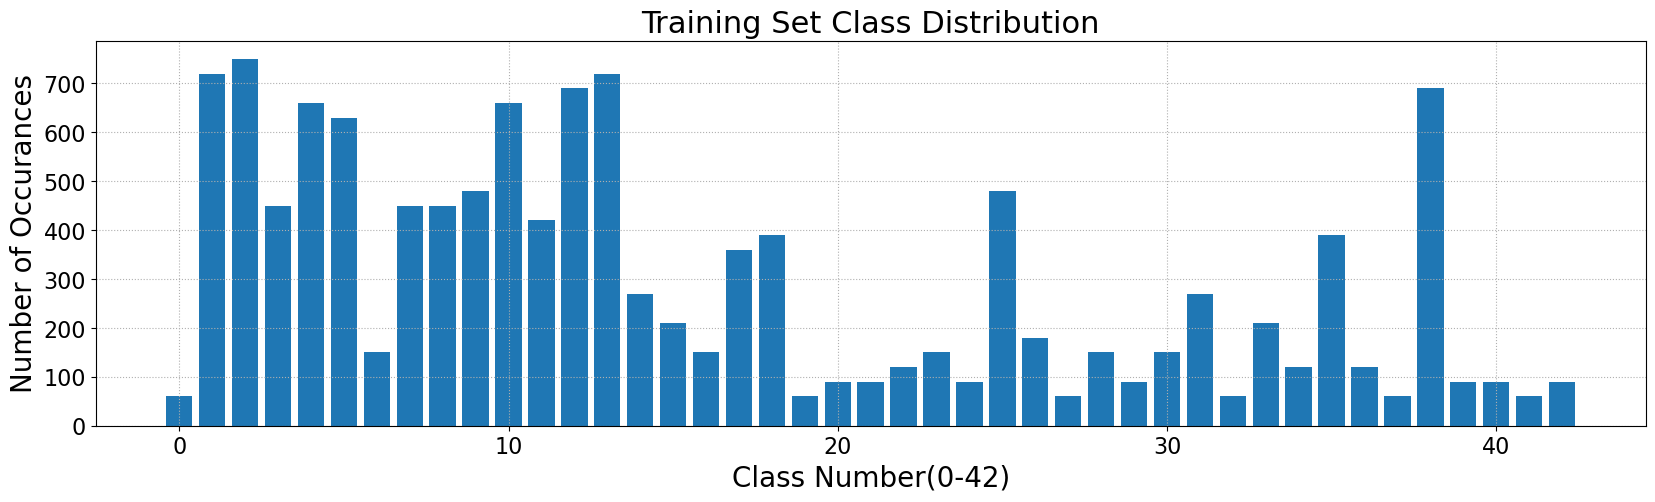

Step 5
Comparing speedlimit signs vs. the rest
The training dataset contains 9 Speedlimit sign classes
The training dataset contains 33 other sign classes


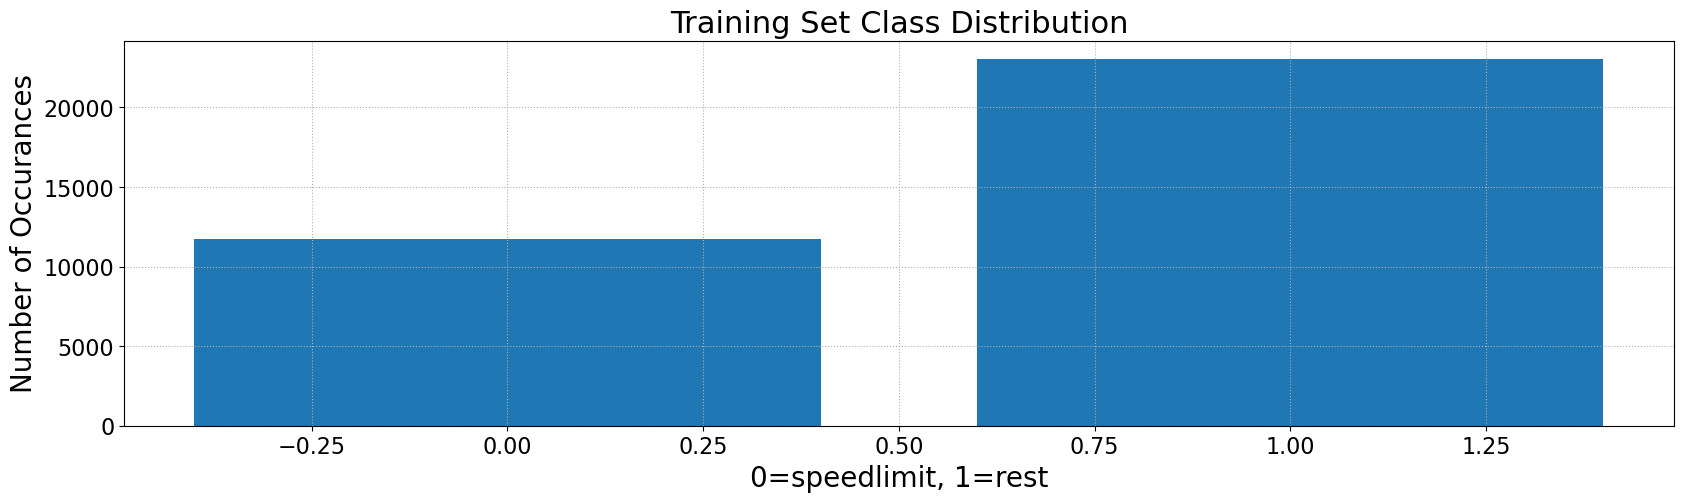

In [11]:
import pickle
import time
import numpy as np

from pandas.io.parsers import read_csv
from matplotlib import pyplot, pyplot as plt, gridspec


def compare_speedLimitSigns_vs_rest(custom_y_train):
    print("Step 6")
    print("Comparing speedlimit signs vs. the rest")
    print("The training dataset contains 9 Speedlimit sign classes")
    print("The training dataset contains 33 other sign classes")
    for i in range(len(custom_y_train)):
        if 0 <= custom_y_train[i] <= 8:
            custom_y_train[i] = 0
        else:
            custom_y_train[i] = 1
    plt = make_plt(custom_y_train, '0=speedlimit, 1=rest', 'Number of Occurances')
    plt.savefig('./Images/03_graph_speedlimit_vs_rest.png')
    plt.show()

def make_plt(y_train, x_label, y_label):
    plt.figure(0, figsize=(20, 5))
    unique_train, counts_train = np.unique(y_train, return_counts=True)
    plt.bar(unique_train, counts_train)

    plt.title('Training Set Class Distribution', fontsize=22)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.tick_params(labelsize=16)
    plt.grid(linestyle=':')
    return plt


def show_occurences_graph(y_train, x_label, y_label):
    print("Step 4")
    print("Comparing occurences of each class in the training dataset")
    # Plot to show frequencies of data for Training dataset
    plt = make_plt(y_train, x_label, y_label)
    plt.savefig('./Images/02_graph_distribution.png')
    plt.show()
    
def show_occurences_graph_test_set(y_test, x_label, y_label):
    print("Step 5")
    print("Comparing occurences of each class in the test dataset")
    # Plot to show frequencies of data for Training dataset
    plt = make_plt(y_test, x_label, y_label)
    plt.savefig('./Images/02_graph_distribution_test_dataset.png')
    plt.show()


def plot_random_each_class(n_row,n_col,X_train, y_train, classes, class_indices, class_counts, sign_names):

    plt.figure(figsize = (25,15))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.5, hspace=0.5) # set the spacing between axes.

    for c, c_i, c_count in zip(classes, class_indices, class_counts):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[c])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(c_i, c_i+c_count)
        plt.imshow(X_train[ind_plot])
        #plt.text(2,4,str(y[ind_plot]),color='k',backgroundcolor='c', fontsize=15)
        plt.text(0, 0, '{}: {:.20}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=12)

        plt.axis('off')
    plt.savefig('./Images/00_overview.png')
    plt.show()


def show_example_img_per_each_class(X_train, classes, class_indices, class_counts, sign_names):
    print("Step 3")
    print("Showing example images for classes 0-14 from the training dataset")
    # Visualizations of image datasets for each class
    for c, c_i, c_count in zip(classes, class_indices, class_counts):
        print(c, ". Class : ", sign_names[c])
        fig = pyplot.figure(figsize=(3, 1))
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
        for i in range(3):
            axis = fig.add_subplot(1, 3, i + 1, xticks=[], yticks=[])
            random_indices = np.random.randint(c_i, c_i + c_count, 10)
            axis.imshow(X_train[random_indices[i], :, :, :])
            # axis.text(0, 0, '{}: {}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=8)
        pyplot.savefig('./Images/01_example_images_class_' + str(c) + '.png')
        pyplot.show()


def basic_text_analysis(X_train, y_train):
    print("Step 2")
    print("Basic analysis of the training dataset")
    n_train = X_train.shape[0]
    image_shape = X_train[0].shape
    classes, class_indices, class_counts = np.unique(y_train, return_index=True, return_counts=True)
    n_classes = len(class_counts)
    print("Number of training examples =", n_train)
    print("Image data shape =", image_shape)
    print("Number of classes =", n_classes)
    return classes, class_indices, class_counts


def load_data():
    print("Step 1")
    print("Loading data...")
    training_file = 'train.p'

    sign_names = read_csv("signname.csv").values[:, 1]

    with open(training_file, mode='rb') as f:
        train = pickle.load(f)

    X_train, y_train = train['features'], train['labels']
    return X_train, y_train, sign_names

def load_test_data():
    print("Loading test data...")
    test_file = 'test.p'

    sign_names = read_csv("signname.csv").values[:, 1]

    with open(test_file, mode='rb') as f:
        test = pickle.load(f)

    X_test, y_test = test['features'], test['labels']
    return X_test, y_test, sign_names


def run():
    print("Letse gooooo")
    X_train, y_train, sign_names = load_data()
    X_test, y_test, sign_names_copy = load_test_data()
    classes, class_indices, class_counts = basic_text_analysis(X_train, y_train)
    time.sleep(1)
    show_example_img_per_each_class(X_train, classes[:14], class_indices[:14], class_counts[:14], sign_names)
    time.sleep(1)
    plot_random_each_class(7,7,X_train, y_train, classes, class_indices, class_counts, sign_names)
    time.sleep(1)
    show_occurences_graph(y_train, 'Class Number(0-42)', 'Number of Occurances')
    time.sleep(1)
    show_occurences_graph_test_set(y_test, 'Class Number(0-42)', 'Number of Occurances')
    time.sleep(1)
    compare_speedLimitSigns_vs_rest(y_train)


if __name__ == '__main__':
    run()